In [6]:
def filter_harmonics(freq_list, harm_tolerance):
    for freq in freq_list:
        fundamental = freq
        harm_one = freq * 2
        harm_two = freq * 3
        
        freq_list[:] = [freq for freq in freq_list if not (harm_one - harm_tolerance < freq < harm_one + harm_tolerance)]
        freq_list[:] = [freq for freq in freq_list if not (harm_two - harm_tolerance < freq < harm_two + harm_tolerance)]

    return freq_list

In [7]:
def sort_freq_note_bins(freq_list):
    frequency_tolerance_bins = {"E2" : [],  # [73.42, 92.50]
                                "A2" : [],  # [98, 123.47]
                                "D3" : [],  # [130.81, 164.81]
                                "G3" : [],  # [174.61, 220]
                                "B3" : [],  # [220.001, 277.18]
                                "E4" : []}  # [293.66, 369.99]
    for freq in freq_list:
        if freq >= 73.42 and freq <= 92.50 :
            frequency_tolerance_bins["E2"].append(freq)
        elif freq >= 98 and freq <= 123.47:
            frequency_tolerance_bins["A2"].append(freq)
        elif freq >= 130.81 and freq <= 164.81:
            frequency_tolerance_bins["D3"].append(freq)
        elif freq >= 174.61 and freq <= 220:
            frequency_tolerance_bins["G3"].append(freq)
        elif freq >= 220.001 and freq <= 277.18:
            frequency_tolerance_bins["B3"].append(freq)
        elif freq >= 293.66 and freq <= 369.99:
            frequency_tolerance_bins["E4"].append(freq)
            
    return frequency_tolerance_bins

In [8]:
def determine_notes(freq_list, harm_tolerance):
    correct_frequencies = {"E2" : 82.41,
                           "A2" : 110, 
                           "D3" : 146.83,
                           "G3" : 196,
                           "B3" : 246.94,
                           "E4" : 329.63}    
    
    frequency_tolerance_bins = sort_freq_note_bins(freq_list)
                    
    for note, freqs in frequency_tolerance_bins.items():
        if len(freqs) > 1:
            closest_freq = 0
            freq_distance = 10000
            for i in range(len(freqs)):
                curr_freq_distance = abs(correct_frequencies[str(note)] - freqs[i])
                if (curr_freq_distance < freq_distance):
                    freq_distance = curr_freq_distance
                    closest_freq = freqs[i]
            freqs[:] = [freq for freq in freqs if freq == closest_freq]
    
    return frequency_tolerance_bins

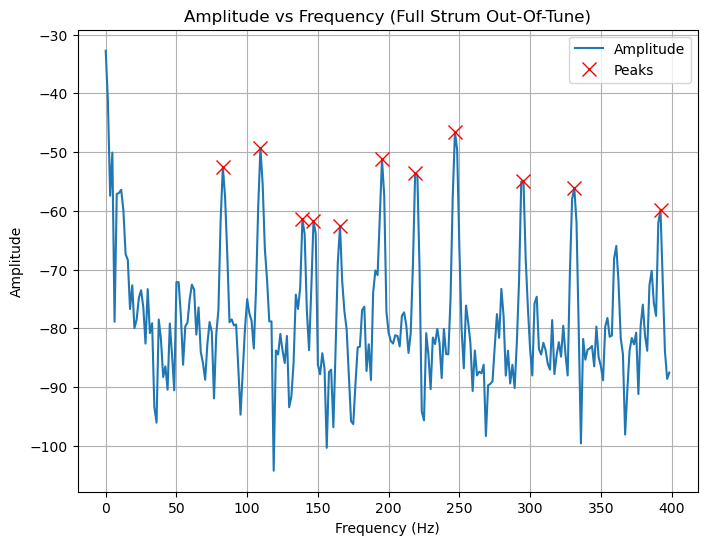

Unfiltered Peaks: [82.8125, 109.375, 139.063, 146.875, 165.625, 195.313, 218.75, 246.875, 295.313, 331.25, 392.188]
Notes: {'E2': [82.8125], 'A2': [109.375], 'D3': [146.875], 'G3': [195.313], 'B3': [246.875], 'E4': [331.25]}


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read the CSV file
df = pd.read_csv("Spectrogram_Scopy_Strings/Strum.csv")

# Find all peaks in the amplitude column
peaks, _ = find_peaks(df['Amplitude CH1(dBV)'])

# Filter out peaks with a frequency below 50Hz
filtered_peaks = [i for i in peaks if df['Frequency(Hz)'].iloc[i] >= 60 and df['Amplitude CH1(dBV)'].iloc[i] > -65]

# Sort the filtered peaks by amplitude value (in descending order) and select the top 4
top_peaks = sorted(filtered_peaks, key=lambda i: df['Amplitude CH1(dBV)'].iloc[i], reverse=True)[:20]

# Print details of the top peaks
freq_peak_list = df['Frequency(Hz)'].iloc[top_peaks].values.tolist()
freq_peak_list.sort()

# Plot amplitude vs frequency
plt.figure(figsize=(8, 6))
plt.plot(df['Frequency(Hz)'], df['Amplitude CH1(dBV)'], label="Amplitude")
# Mark the top peaks
plt.plot(df['Frequency(Hz)'].iloc[top_peaks],
         df['Amplitude CH1(dBV)'].iloc[top_peaks],
         "x", markersize=10, label="Peaks", color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Frequency (Full Strum Out-Of-Tune)")
plt.legend()
plt.grid(True)
plt.show()

print("Unfiltered Peaks:", freq_peak_list)
print("Notes:", determine_notes(freq_peak_list, 1))